<a target="_blank" href="https://colab.research.google.com/github/trainocate-japan/Machine-Learning-and-Deep-Learning-Hands-on/blob/main/answer/3_ロジスティック回帰/3-2_(演習)ロジスティック回帰によるアヤメの分類.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


# 3-2.ロジスティック回帰によるアヤメの分類

## ライブラリのインポート

In [ ]:
# データを処理するための基本的なライブラリ
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
# 訓練データと検証データを分けるライブラリ
from sklearn.model_selection import train_test_split

In [ ]:
# ロジスティック回帰モデルをインポート 
from sklearn.linear_model import LogisticRegression

Google Colaboratory上での出力のデフォルト設定

In [ ]:
# pandasのDataframeの出力
pd.set_option('display.max_columns', 500) # 表示列の最大
pd.set_option('display.max_rows', 500) # 表示行の最大
pd.set_option('display.unicode.east_asian_width', True) # 日本語出力時にヘッダのずれを解消
pd.options.display.float_format = '{:,.5f}'.format # 表示桁数の設定

# ノートブックの表示桁数設定。この設定はprint文には作用せず、セルの最後に書いたものを出力する際に適用されます。
%precision 3
# numpy配列の指数表示禁止設定
np.set_printoptions(suppress=True)
# numpy配列の表示桁数設定
np.set_printoptions(precision=3)

## データの準備
今回使用するデータはscikit-learnからもデータセットとして利用することができる、Iris DataSetのコピーです。<br>
もととなるIris DataSetはUCI Machine Learning Repositoryから公開されています。<br>
downloaded from : https://archive.ics.uci.edu/ml/datasets/iris

データセットについての説明はこちらに記載されています。<br>
https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-dataset


#### データを取り込む
- pandasのread_csvメソッドを使用して、mlho/data/iris2.csvファイルを読み込みます
- 読み込んだものは変数df_irisに代入します



In [ ]:
# csvファイルを読み込みます
df_iris = pd.read_csv("/content/drive/MyDrive/mlho/data/iris2.csv")

#### データを確認する

In [ ]:
# 読み込んだデータを確認します
# 目的変数となるのはClassの列でアヤメの種類。0:setosa、1:versicolor、2:virginica 
# sepal length：花のガクの長さ
# sepal width：花のガクの幅
# petal length：花びらの長さ
# petal width：花びらの幅
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.10000,3.50000,1.40000,0.20000,0
1,4.90000,3.00000,1.40000,0.20000,0
2,4.70000,3.20000,1.30000,0.20000,0
3,4.60000,3.10000,1.50000,0.20000,0
4,5.00000,3.60000,1.40000,0.20000,0


In [ ]:
# df_irisのデータ要約を確認
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Class              150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
# df_irisの統計情報を確認
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
count,150.00000,150.00000,150.00000,150.00000,150.00000
mean,5.84333,3.05733,3.75800,1.19933,1.00000
std,0.82807,0.43587,1.76530,0.76224,0.81923
min,4.30000,2.00000,1.00000,0.10000,0.00000
25%,5.10000,2.80000,1.60000,0.30000,0.00000
50%,5.80000,3.00000,4.35000,1.30000,1.00000
75%,6.40000,3.30000,5.10000,1.80000,2.00000
max,7.90000,4.40000,6.90000,2.50000,2.00000


#### 変数の相関（関係性）を確認する

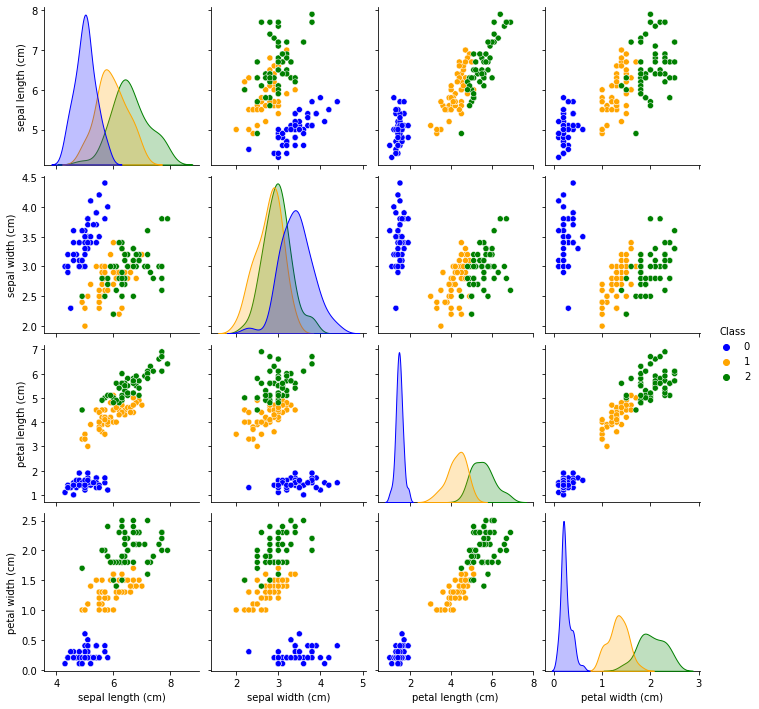

In [ ]:
# seabornのpairplotメソッドを使用して変数の相関を確認
# 多値分類の場合には凡例を指定することで、各クラスごとに色分けをして表示できる
# 凡例(hue)に目的変数のClassを指定し、paletteで色を指定する
sns.pairplot(df_iris, hue='Class', palette={0:'blue', 1:'orange', 2:'green'})

#### 説明変数、目的変数を切り出す

In [ ]:
# 目的変数にするClass以外をすべて説明変数にする
x = df_iris.drop(columns='Class')

In [ ]:
x.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.10000,3.50000,1.40000,0.20000
1,4.90000,3.00000,1.40000,0.20000


In [ ]:
y = df_iris['Class']

In [ ]:
y.head(2)

0    0
1    0
Name: Class, dtype: int64

#### データを訓練データと検証データに分割する

**※ 検証データを分ける際のrandom_stateに70を指定していますが、0を指定した際に検証データが非常に簡単になってしまうためです**

In [ ]:
# 訓練データと検証データに分割(70%を訓練用に使用)
train_x, val_x, train_y, val_y = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=70, stratify=y)

## モデルの定義

In [ ]:
model = LogisticRegression(max_iter=2500)

## モデルの学習

In [ ]:
model.fit(train_x, train_y)

LogisticRegression(max_iter=2500)

## 評価

In [ ]:
# 訓練データで予測精度（正解率）を確認する
model.score(train_x, train_y)

0.981

In [ ]:
# 検証データで予測精度（正解率）を確認する
model.score(val_x, val_y)

0.956

In [ ]:
# 検証データで予測し、最初の5件の分類確立を確認してみる(0=Setosa,1=Versicolor, 2=Virginica)
model.predict_proba(val_x)[:5]

array([[0.021, 0.938, 0.041],
       [0.94 , 0.06 , 0.   ],
       [0.   , 0.155, 0.845],
       [0.   , 0.132, 0.868],
       [0.   , 0.004, 0.996]])

In [ ]:
# 最初の5件の検証データで予測結果を表示
model.predict(val_x)[:5]

array([1, 0, 2, 2, 2])

In [ ]:
# 正解を確認する
val_y.head()

71     1
24     0
111    2
137    2
117    2
Name: Class, dtype: int64

## 予測精度の改善

#### データのスケールを揃える

In [ ]:
# 訓練データ説明変数の各列の平均を計算する
train_x_mean = train_x.mean()
train_x_mean.head()

sepal length (cm)   5.79810
sepal width (cm)    3.02190
petal length (cm)   3.73714
petal width (cm)    1.19524
dtype: float64

In [ ]:
# 訓練データ説明変数の各列の標準偏差を計算する
train_x_std = train_x.std()
train_x_std.head()

sepal length (cm)   0.82532
sepal width (cm)    0.39855
petal length (cm)   1.76435
petal width (cm)    0.76929
dtype: float64

In [ ]:
# 訓練データの標準化を行う
train_x_scaled = (train_x - train_x_mean) / train_x_std
train_x_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
79,-0.11886,-1.05860,-0.13441,-0.25379
4,-0.96702,1.45049,-1.32465,-1.29371
126,0.48697,-0.55678,0.60241,0.78613
96,-0.11886,-0.30587,0.26234,0.13618
92,0.00231,-1.05860,0.14898,0.00619


In [ ]:
# 検証データの標準化を行う
val_x_scaled = (val_x - train_x_mean) / train_x_std
val_x_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
71,0.36580,-0.55678,0.14898,0.13618
24,-1.20935,0.94868,-1.04126,-1.29371
111,0.72930,-0.80769,0.88580,0.91612
137,0.72930,0.19595,0.99915,0.78613
117,2.30445,1.95231,1.67929,1.30609


In [ ]:
# ロジスティック回帰分析の実行
model.fit(train_x_scaled, train_y)

LogisticRegression(max_iter=2500)

In [ ]:
# 訓練データで予測精度（正解率）を確認する
model.score(train_x_scaled, train_y)

0.971

In [ ]:
# 検証データで予測精度（正解率）を確認する
model.score(val_x_scaled, val_y)

0.956

## 精度以外の評価指標を確認する

In [ ]:
# まとめて評価指標を確認できるclassification_reportをインポート
from sklearn.metrics import classification_report

In [ ]:
# まずは予測を行う
prediction = model.predict(val_x_scaled)

In [ ]:
# classification_reportでまとめて評価指標を確認
# printを使用することでフォーマットが整形されて出力される
print(classification_report(val_y, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      0.93      0.93        15
           2       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



このノートブックは以上です。